In [ ]:
from google.colab import drive
drive.mount("/content/drive")

#to confirm gpu access
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive
/device:GPU:0


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch

In [ ]:
os.chdir('drive/My Drive/nlp_project')

In [ ]:
all=pd.read_csv('all_data.csv')
annotator_data=pd.read_csv('toxicity_individual_annotations.csv')

In [ ]:
columns = ['id', 'comment_text', 'toxicity_annotator_count', 'toxicity']
drop_cols = []
for c in all.columns:
  if c not in columns:
    drop_cols.append(c)
all = all.drop(drop_cols, axis=1)
ambiguous = all[all['toxicity_annotator_count'] > 70]
unambiguous = all[all['toxicity_annotator_count'] <= 70]

In [ ]:
ambiguous

,id,comment_text,toxicity,toxicity_annotator_count
1,650904,Mad dog will surely put the liberals in mental...,0.605263,76
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
6,5764010,I really wish the DP would bounce people tryin...,0.525000,80
9,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
1997406,787595,Predators. Predators will kill for a pound of ...,0.400000,80
1997881,450507,"Fred, this column is about you. Shame. Shame...",0.400000,80
1998270,5006772,With Horrific Moral Decay in women the last 3...,0.400000,80
1998296,6015387,"Tolerance, diversity.... call it whatever you ...",0.400000,80


In [ ]:
ambiguous_len = len(ambiguous)
ambiguous_0 = ambiguous[:int(ambiguous_len/2)]
ambiguous_1 = ambiguous[int(ambiguous_len/2)+1:]

In [ ]:
ambiguous_0

,id,comment_text,toxicity,toxicity_annotator_count
1,650904,Mad dog will surely put the liberals in mental...,0.605263,76
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
6,5764010,I really wish the DP would bounce people tryin...,0.525000,80
9,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
331342,303884,Trump will crush Hillary like the cockroach sh...,0.737500,80
331345,725286,Now why do you want to poison Mr. Fuzzypaws? T...,0.722222,72
331348,5668076,"Fire this Admiral, he is clearly an idiot too.",0.912500,80
331349,4962998,Can't have them thinking they represent half o...,0.447368,76


In [ ]:
annotator_data = pd.read_csv('toxicity_individual_annotations.csv')

In [ ]:
annotator_data[annotator_data['id']==7084460]

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat


In [ ]:
annotator_data[annotator_data['id']=='7084460']

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat


In [ ]:
ambiguous_0

,id,comment_text,toxicity,toxicity_annotator_count
1,650904,Mad dog will surely put the liberals in mental...,0.605263,76
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
6,5764010,I really wish the DP would bounce people tryin...,0.525000,80
9,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
331342,303884,Trump will crush Hillary like the cockroach sh...,0.737500,80
331345,725286,Now why do you want to poison Mr. Fuzzypaws? T...,0.722222,72
331348,5668076,"Fire this Admiral, he is clearly an idiot too.",0.912500,80
331349,4962998,Can't have them thinking they represent half o...,0.447368,76


In [ ]:
threshold = 10
c = 1
analysis_10 = pd.DataFrame()
for i in ambiguous_0['id']:
  print(i)
  print(annotator_data[annotator_data['id']==i][:threshold]['toxic'])
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/threshold
  analysis_10=analysis_10.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1

In [ ]:
train_test = pd.concat([ambiguous_1,unambiguous[:135000]])
train_test.to_csv('train_test.csv')

In [ ]:
!ls

In [ ]:
threshold = 30
c = 1
analysis_30 = pd.DataFrame()
for i in ambiguous_0['id']:
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/threshold
  analysis_30=analysis_30.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_30.to_csv('analysis_30.csv', encoding='utf-8')

In [ ]:
threshold = 50
c = 1
analysis_50 = pd.DataFrame()
for i in ambiguous_0['id']:
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/threshold
  analysis_50=analysis_50.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_50.to_csv('analysis_50.csv', encoding='utf-8')

In [ ]:
threshold = 70
c = 1
analysis_70 = pd.DataFrame()
for i in ambiguous_0['id']:
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/threshold
  analysis_70=analysis_70.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_70.to_csv('analysis_70.csv', encoding='utf-8')

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 21.8 MB/s 
     |████████████████████████████████| 7.6 MB 58.6 MB/s 
     |████████████████████████████████| 182 kB 63.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 33.1 MB/s 
     |████████████████████████████████| 212 kB 55.8 MB/s 
     |████████████████████████████████| 115 kB 71.6 MB/s 
     |████████████████████████████████| 127 kB 70.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import numpy as np
import pandas as pd
import transformers
from datasets import Dataset,load_dataset, load_from_disk
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import mean_squared_error


In [ ]:
train_test = pd.read_csv('train_test.csv')

In [ ]:
train_test = train_test.drop(['id','Unnamed: 0','toxicity_annotator_count'],axis=1)

In [ ]:
train_test.rename(columns={'comment_text':'text', 'toxicity':'label'}, inplace = True)
train_test

,text,label
0,The washington compost? Yea they are a bunch o...,0.666667
1,Bloody thief! Stealing ID' s off Facebook and ...,0.733333
2,"Silly, he could have used an ax.",0.661972
3,It's those damned Lutherans again!,0.875000
4,"all you illegal criminals, very soon you will ...",0.956873
...,...,...
149708,Not sure why you're getting all triggered by m...,0.000000
149709,"""He's calling on politicians to stop complaini...",0.000000
149710,"BS, first you are an authority on what is appr...",0.000000
149711,The Public Works & Development Director vacan...,0.000000


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm

In [ ]:
def RemoveWords(data , feature):
    for i in tqdm(range(data.shape[0])) :
        this_phrase = data[feature][i]
        new_phrase = []
        for word in this_phrase.split() :
            new_phrase.append(word.lower())
        data.loc[i, feature] = ' '.join(new_phrase)
    return data

In [ ]:
train_test = RemoveWords(train_test, 'text')

100%|██████████| 149713/149713 [10:13<00:00, 243.93it/s]


In [ ]:
train_test

,text,label
0,the washington compost? yea they are a bunch o...,0.666667
1,bloody thief! stealing id' s off facebook and ...,0.733333
2,"silly, he could have used an ax.",0.661972
3,it's those damned lutherans again!,0.875000
4,"all you illegal criminals, very soon you will ...",0.956873
...,...,...
149708,not sure why you're getting all triggered by m...,0.000000
149709,"""he's calling on politicians to stop complaini...",0.000000
149710,"bs, first you are an authority on what is appr...",0.000000
149711,the public works & development director vacanc...,0.000000


In [ ]:
dataset = Dataset.from_pandas(train_test,preserve_index=False)
dataset = dataset.train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 134741
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 14972
    })
})

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)
tokenized_datasets = dataset.map(tokenize_function, batched=True)

  0%|          | 0/135 [00:00<?, ?ba/s]

  0%|          | 0/15 [00:00<?, ?ba/s]

In [ ]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)
model.resize_token_embeddings(len(tokenizer))
from datasets import load_metric
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    rmse = mean_squared_error(labels, predictions, squared=False)
    return {"rmse": rmse}

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer",
                                  logging_strategy="epoch",
                                  evaluation_strategy="epoch",
                                  per_device_train_batch_size=32,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=1,
                                  save_total_limit = 2,
                                  save_strategy = 'no',
                                  load_best_model_at_end=False,
                                  # label_names = ['toxicity']
                                  )
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    compute_metrics=compute_metrics
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 134741
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4211
  Number of trainable parameters = 66954241


Epoch,Training Loss,Validation Loss,Rmse
1,0.015900,0.012697,0.112681


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14972
  Batch size = 32


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=4211, training_loss=0.01589299086238052, metrics={'train_runtime': 6168.9001, 'train_samples_per_second': 21.842, 'train_steps_per_second': 0.683, 'total_flos': 1.7848471454481408e+16, 'train_loss': 0.01589299086238052, 'epoch': 1.0})

In [ ]:
tokenized_datasets["train"]

In [ ]:
# save the model/tokenizer
model.save_pretrained("model")
tokenizer.save_pretrained("tokenizer")
# load the model/tokenizer
from transformers import AutoModelForTokenClassification
model = AutoModelForSequenceClassification.from_pretrained("model")
tokenizer = AutoTokenizer.from_pretrained("tokenizer")

Configuration saved in model/config.json
Model weights saved in model/pytorch_model.bin
tokenizer config file saved in tokenizer/tokenizer_config.json
Special tokens file saved in tokenizer/special_tokens_map.json
loading configuration file model/config.json
Model config DistilBertConfig {
  "_name_or_path": "model",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "regression",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file model/pytorch_model.bin
All mod

In [ ]:
from transformers import Trainer
trainer = Trainer(model=model)
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)
def pipeline_prediction(text):
    df=pd.DataFrame({'text':[text]})
    dataset = Dataset.from_pandas(df,preserve_index=False)
    tokenized_datasets = dataset.map(tokenize_function)
    raw_pred, _, _ = trainer.predict(tokenized_datasets)
    return(raw_pred[0][0])


No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
print(ambiguous['comment_text'][3])
print(ambiguous['toxicity'][3])

"while arresting a man for resisting arrest".

If you cop-suckers can't see a problem with this, then go suck the barrel of a Glock.
0.8157894736842106


In [ ]:
pipeline_prediction('while arresting a man for resisting arrest If you cop-suckers cant see a problem with this, then go suck the barrel of a Glock')

  0%|          | 0/1 [00:00<?, ?ex/s]

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1
  Batch size = 8


0.6859442

In [ ]:
!ls

all_data.csv			     test_private_expanded.csv
analysis_10.csv			     test_public_expanded.csv
analysis_30.csv			     test_trainer
analysis_50.csv			     tmp_trainer
analysis_70.csv			     tokenizer
identity_individual_annotations.csv  toxicity_individual_annotations.csv
model				     train.csv
sample_submission.csv		     train_test.csv
test.csv


In [ ]:
torch.save(model.state_dict(), 'drive/My Drive/nlp_project')


In [ ]:
analysis_10 = pd.read_csv('analysis_10.csv')
analysis_30 = pd.read_csv('analysis_30.csv')
analysis_50 = pd.read_csv('analysis_50.csv')
analysis_70 = pd.read_csv('analysis_70.csv')
analysis_90 = pd.read_csv('analysis_90.csv')
analysis_110 = pd.read_csv('analysis_110.csv')
analysis_130 = pd.read_csv('analysis_130.csv')
analysis_150 = pd.read_csv('analysis_150.csv')

In [ ]:
ldf[0]

,id,toxicity
0,650904.0,0.4
1,7084460.0,0.0
2,5410943.0,0.6
3,5764010.0,0.3
4,5263240.0,0.9
...,...,...
14708,303884.0,0.8
14709,725286.0,0.4
14710,5668076.0,0.9
14711,4962998.0,0.4


In [ ]:
ldf = [analysis_10, analysis_30, analysis_50, analysis_70, analysis_90, analysis_110, analysis_130, analysis_150]
def clean(ldf):
  for i in range(len(ldf)):
    ldf[i] = ldf[i].drop(['Unnamed: 0'],axis=1)
  return ldf
ldf = clean(ldf)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ambiguous_0['srno'] = range(len(ambiguous_0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ambiguous_0.set_index('srno', inplace=True)

[0.4, 0.0, 0.6, 0.3, 0.9, 0.0, 0.0, 0.8, 0.6, 0.7, 0.5, 0.4, 0.5, 0.0, 0.5, 0.3, 0.5, 0.5, 0.3, 0.3]
4
[0.5333333333333333, 0.0, 0.5333333333333333, 0.5333333333333333, 0.8666666666666667, 0.0, 0.0, 0.7, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.4, 0.4666666666666667, 0.0, 0.3666666666666666, 0.4666666666666667, 0.6333333333333333, 0.6, 0.4333333333333333, 0.5]
4
[0.6, 0.0, 0.52, 0.5, 0.78, 0.0, 0.0, 0.72, 0.54, 0.6, 0.58, 0.5, 0.5, 0.0, 0.3, 0.48, 0.66, 0.58, 0.48, 0.62]
4
[0.6, 0.0, 0.5428571428571428, 0.5142857142857142, 0.7, 0.0, 0.0, 0.7285714285714285, 0.5714285714285714, 0.6714285714285714, 0.6, 0.5571428571428572, 0.5428571428571428, 0.0142857142857142, 0.3428571428571428, 0.5142857142857142, 0.6285714285714286, 0.5142857142857142, 0.4714285714285714, 0.6285714285714286]
3
[0.6052631578947368, 0.0, 0.55, 0.525, 0.7105263157894737, 0.0, 0.0, 0.7361111111111112, 0.581081081081081, 0.6875, 0.625, 0.5466666666666666, 0.55, 0.0111111111111111, 0.3875, 0.55, 0.619

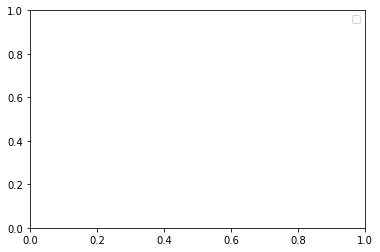

In [ ]:
plt.figure()
t = 20

for i in range(len(ldf)):
  c=0
  y=ldf[i]['toxicity'][:t]
  for j in y:
    if j==0:
      c+=1
  print(c)
  plt.plot(range(len(y)),y,label=str(i*20+10))

plt.legend()

In [ ]:
analysis = pd.DataFrame()
analysis['id'] = ldf[0]['id']
analysis['ann_10'] = ldf[0]['toxicity']
analysis['ann_30'] = ldf[1]['toxicity']
analysis['ann_50'] = ldf[2]['toxicity']
analysis['ann_70'] = ldf[3]['toxicity']
analysis['ann_90'] = ldf[4]['toxicity']
analysis['ann_110'] = ldf[5]['toxicity']
analysis['ann_130'] = ldf[6]['toxicity']
analysis['ann_150'] = ldf[7]['toxicity']
analysis['sum'] = analysis['ann_10']+analysis['ann_30']+analysis['ann_50']+analysis['ann_70']+analysis['ann_90']+analysis['ann_110']+analysis['ann_130']+analysis['ann_150']
analysis
# delete all rows with column 'Age' has value 30 to 40
condition = analysis[(analysis['sum'] == 0)].index
analysis.drop(condition , inplace=True)
analysis['srno'] = range(len(analysis['id']))
analysis.set_index('srno',inplace=True)

In [ ]:
analysis

,id,ann_10,ann_30,ann_50,ann_70,ann_90,ann_110,ann_130,ann_150,sum
srno,,,,,,,,,,
0,650904.0,0.4,0.533333,0.60,0.600000,0.605263,0.605263,0.605263,0.605263,4.554386
1,5410943.0,0.6,0.533333,0.52,0.542857,0.550000,0.550000,0.550000,0.550000,4.396190
2,5764010.0,0.3,0.533333,0.50,0.514286,0.525000,0.525000,0.525000,0.525000,3.947619
3,5263240.0,0.9,0.866667,0.78,0.700000,0.710526,0.710526,0.710526,0.710526,6.088772
4,320268.0,0.8,0.700000,0.72,0.728571,0.736111,0.736111,0.736111,0.736111,5.893016
...,...,...,...,...,...,...,...,...,...,...
13201,303884.0,0.8,0.800000,0.74,0.714286,0.737500,0.737500,0.737500,0.737500,6.004286
13202,725286.0,0.4,0.633333,0.66,0.714286,0.722222,0.722222,0.722222,0.722222,5.296508
13203,5668076.0,0.9,0.966667,0.94,0.914286,0.912500,0.912500,0.912500,0.912500,7.370952


In [ ]:
Y = []
ids = analysis['id']
for i in ids:
  Y.append(float(ambiguous_0[ambiguous_0['id']==i]['toxicity']))

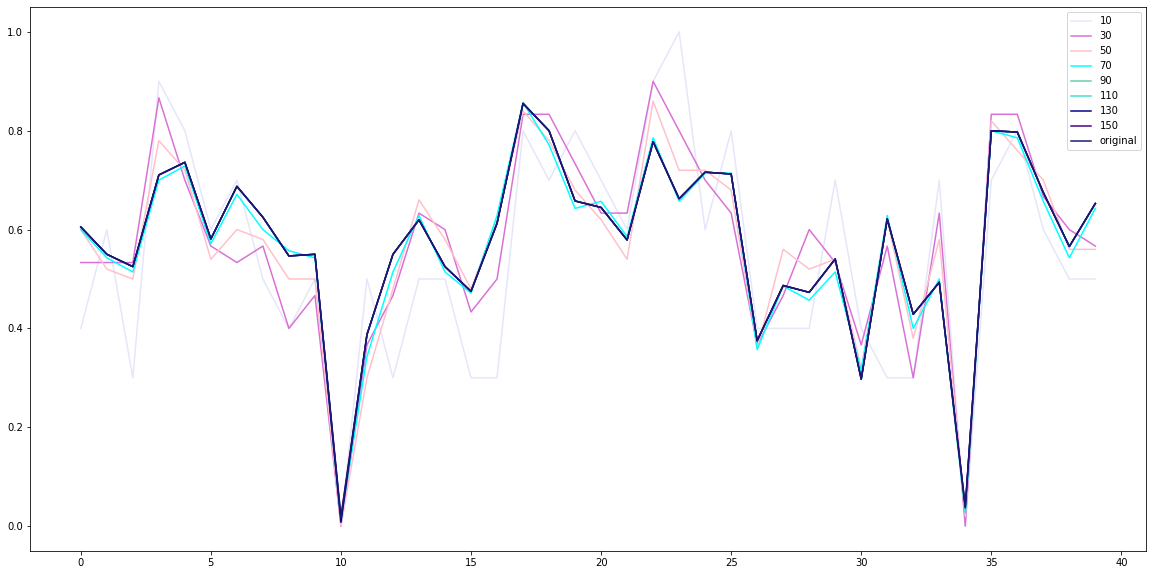

In [ ]:
x=range(len(analysis['id']))
t = 40
plt.figure(figsize=(20,10))
x = x[:t]
plt.plot(x,analysis['ann_10'][:t], label= '10', color="lavender")
plt.plot(x,analysis['ann_30'][:t], label= '30', color='orchid')
plt.plot(x,analysis['ann_50'][:t], label= '50', color='pink')
plt.plot(x,analysis['ann_70'][:t], label= '70', color='aqua')
plt.plot(x,analysis['ann_90'][:t], label= '90', color='mediumaquamarine')
plt.plot(x,analysis['ann_110'][:t], label= '110', color='turquoise')
plt.plot(x,analysis['ann_130'][:t], label= '130', color='darkblue')
plt.plot(x,analysis['ann_150'][:t], label= '150', color='indigo')



plt.plot(x, Y[:t], label='original', color='midnightblue')
plt.legend()

In [ ]:
ambiguous_0

,id,comment_text,toxicity,toxicity_annotator_count
srno,,,,
0,650904,Mad dog will surely put the liberals in mental...,0.605263,76
1,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
2,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
3,5764010,I really wish the DP would bounce people tryin...,0.525000,80
4,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
14708,303884,Trump will crush Hillary like the cockroach sh...,0.737500,80
14709,725286,Now why do you want to poison Mr. Fuzzypaws? T...,0.722222,72
14710,5668076,"Fire this Admiral, he is clearly an idiot too.",0.912500,80


In [ ]:
Y

[0.6052631578947368,
 0.8157894736842106,
 0.55,
 0.525,
 0.7105263157894737,
 0.5972222222222222,
 0.65,
 0.7361111111111109]

In [ ]:
ambiguous_0['Srno']

,id,comment_text,toxicity,toxicity_annotator_count
Srno,,,,
0,650904,Mad dog will surely put the liberals in mental...,0.605263,76
1,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
2,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
3,5764010,I really wish the DP would bounce people tryin...,0.525000,80
4,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
14708,303884,Trump will crush Hillary like the cockroach sh...,0.737500,80
14709,725286,Now why do you want to poison Mr. Fuzzypaws? T...,0.722222,72
14710,5668076,"Fire this Admiral, he is clearly an idiot too.",0.912500,80


In [ ]:
threshold = 90
c = 1
analysis_90 = pd.DataFrame()
for i in ambiguous_0['id']:
  x = list(ambiguous_0[ambiguous_0['id']==i]['toxicity_annotator_count'])[0]
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/min(x,threshold)
  analysis_90=analysis_90.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_90.to_csv('analysis_90.csv', encoding='utf-8')

Streaming output truncated to the last 5000 lines.
9714 done
9715 done
9716 done
9717 done
9718 done
9719 done
9720 done
9721 done
9722 done
9723 done
9724 done
9725 done
9726 done
9727 done
9728 done
9729 done
9730 done
9731 done
9732 done
9733 done
9734 done
9735 done
9736 done
9737 done
9738 done
9739 done
9740 done
9741 done
9742 done
9743 done
9744 done
9745 done
9746 done
9747 done
9748 done
9749 done
9750 done
9751 done
9752 done
9753 done
9754 done
9755 done
9756 done
9757 done
9758 done
9759 done
9760 done
9761 done
9762 done
9763 done
9764 done
9765 done
9766 done
9767 done
9768 done
9769 done
9770 done
9771 done
9772 done
9773 done
9774 done
9775 done
9776 done
9777 done
9778 done
9779 done
9780 done
9781 done
9782 done
9783 done
9784 done
9785 done
9786 done
9787 done
9788 done
9789 done
9790 done
9791 done
9792 done
9793 done
9794 done
9795 done
9796 done
9797 done
9798 done
9799 done
9800 done
9801 done
9802 done
9803 done
9804 done
9805 done
9806 done
9807 done
9808 done

In [ ]:
threshold = 110
c = 1
analysis_110 = pd.DataFrame()
for i in ambiguous_0['id']:
  x = list(ambiguous_0[ambiguous_0['id']==i]['toxicity_annotator_count'])[0]
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/min(x,threshold)
  analysis_110=analysis_110.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_110.to_csv('analysis_110.csv', encoding='utf-8')

Streaming output truncated to the last 5000 lines.
9714 done
9715 done
9716 done
9717 done
9718 done
9719 done
9720 done
9721 done
9722 done
9723 done
9724 done
9725 done
9726 done
9727 done
9728 done
9729 done
9730 done
9731 done
9732 done
9733 done
9734 done
9735 done
9736 done
9737 done
9738 done
9739 done
9740 done
9741 done
9742 done
9743 done
9744 done
9745 done
9746 done
9747 done
9748 done
9749 done
9750 done
9751 done
9752 done
9753 done
9754 done
9755 done
9756 done
9757 done
9758 done
9759 done
9760 done
9761 done
9762 done
9763 done
9764 done
9765 done
9766 done
9767 done
9768 done
9769 done
9770 done
9771 done
9772 done
9773 done
9774 done
9775 done
9776 done
9777 done
9778 done
9779 done
9780 done
9781 done
9782 done
9783 done
9784 done
9785 done
9786 done
9787 done
9788 done
9789 done
9790 done
9791 done
9792 done
9793 done
9794 done
9795 done
9796 done
9797 done
9798 done
9799 done
9800 done
9801 done
9802 done
9803 done
9804 done
9805 done
9806 done
9807 done
9808 done

In [ ]:
threshold = 130
c = 1
analysis_130 = pd.DataFrame()
for i in ambiguous_0['id']:
  x = list(ambiguous_0[ambiguous_0['id']==i]['toxicity_annotator_count'])[0]
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/min(x,threshold)
  analysis_130=analysis_130.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_130.to_csv('analysis_130.csv', encoding='utf-8')

Streaming output truncated to the last 5000 lines.
9714 done
9715 done
9716 done
9717 done
9718 done
9719 done
9720 done
9721 done
9722 done
9723 done
9724 done
9725 done
9726 done
9727 done
9728 done
9729 done
9730 done
9731 done
9732 done
9733 done
9734 done
9735 done
9736 done
9737 done
9738 done
9739 done
9740 done
9741 done
9742 done
9743 done
9744 done
9745 done
9746 done
9747 done
9748 done
9749 done
9750 done
9751 done
9752 done
9753 done
9754 done
9755 done
9756 done
9757 done
9758 done
9759 done
9760 done
9761 done
9762 done
9763 done
9764 done
9765 done
9766 done
9767 done
9768 done
9769 done
9770 done
9771 done
9772 done
9773 done
9774 done
9775 done
9776 done
9777 done
9778 done
9779 done
9780 done
9781 done
9782 done
9783 done
9784 done
9785 done
9786 done
9787 done
9788 done
9789 done
9790 done
9791 done
9792 done
9793 done
9794 done
9795 done
9796 done
9797 done
9798 done
9799 done
9800 done
9801 done
9802 done
9803 done
9804 done
9805 done
9806 done
9807 done
9808 done

In [ ]:
threshold = 150
c = 1
analysis_150 = pd.DataFrame()
for i in ambiguous_0['id']:
  x = list(ambiguous_0[ambiguous_0['id']==i]['toxicity_annotator_count'])[0]
  noisy_toxicity_value=(annotator_data[annotator_data['id']==i][:threshold]['toxic'].sum())/min(x,threshold)
  analysis_150=analysis_150.append({'id':int(i),'toxicity':noisy_toxicity_value},ignore_index=True)
  print(str(c)+' done')
  c+=1
analysis_150.to_csv('analysis_150.csv', encoding='utf-8')

Streaming output truncated to the last 5000 lines.
9714 done
9715 done
9716 done
9717 done
9718 done
9719 done
9720 done
9721 done
9722 done
9723 done
9724 done
9725 done
9726 done
9727 done
9728 done
9729 done
9730 done
9731 done
9732 done
9733 done
9734 done
9735 done
9736 done
9737 done
9738 done
9739 done
9740 done
9741 done
9742 done
9743 done
9744 done
9745 done
9746 done
9747 done
9748 done
9749 done
9750 done
9751 done
9752 done
9753 done
9754 done
9755 done
9756 done
9757 done
9758 done
9759 done
9760 done
9761 done
9762 done
9763 done
9764 done
9765 done
9766 done
9767 done
9768 done
9769 done
9770 done
9771 done
9772 done
9773 done
9774 done
9775 done
9776 done
9777 done
9778 done
9779 done
9780 done
9781 done
9782 done
9783 done
9784 done
9785 done
9786 done
9787 done
9788 done
9789 done
9790 done
9791 done
9792 done
9793 done
9794 done
9795 done
9796 done
9797 done
9798 done
9799 done
9800 done
9801 done
9802 done
9803 done
9804 done
9805 done
9806 done
9807 done
9808 done

In [ ]:
ambiguous_0

,id,comment_text,toxicity,toxicity_annotator_count
1,650904,Mad dog will surely put the liberals in mental...,0.605263,76
3,7084460,"""while arresting a man for resisting arrest"".\...",0.815789,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,0.550000,80
6,5764010,I really wish the DP would bounce people tryin...,0.525000,80
9,5263240,Only a fool would believe that the MSM is not ...,0.710526,76
...,...,...,...,...
331342,303884,Trump will crush Hillary like the cockroach sh...,0.737500,80
331345,725286,Now why do you want to poison Mr. Fuzzypaws? T...,0.722222,72
331348,5668076,"Fire this Admiral, he is clearly an idiot too.",0.912500,80
331349,4962998,Can't have them thinking they represent half o...,0.447368,76
